# Analyzing borrowers’ risk of default

This project is to prepare a report for a bank’s loan division. We’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

The final report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.




## Open the data file and have a look at the general information. 

[Start with importing the libraries and loading the data. You may realise that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
pwd

'C:\\Users\\josef\\PRACTICUM\\Project 1-Credit scoring'

In [2]:
# Loading all the libraries

import pandas as pd


In [3]:
# Load the data (try reading from Jupyter directory, or from Practicum datasets if not found)

try:
    credit_df=pd.read_csv('C:\\Users\\josef\\PRACTICUM\\Project 1-Credit scoring/credit_scoring_eng.csv')
except:
    credit_df=pd.read_csv('/datasets/credit_scoring_eng.csv')


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



In [4]:
# Let's see how many rows and columns our dataset has
credit_df.shape
df_rows= credit_df.shape[0]
print(f'The dataset has {credit_df.shape[0]} rows and {credit_df.shape[1]} columns.')

The dataset has 21525 rows and 12 columns.


In [5]:
# let's print the first N rows

print('Data overview:')
credit_df.head()

Data overview:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [6]:
credit_df.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


In [7]:
credit_df.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3135,0,-2967.292449,63,secondary education,1,married,0,M,civil servant,0,9107.739,purchase of a car
12599,0,-3404.817572,58,SECONDARY EDUCATION,1,married,0,F,civil servant,0,29897.969,to get a supplementary education
17716,0,-2008.875809,46,secondary education,1,married,0,F,employee,0,25482.515,profile education
2993,0,-1605.182113,34,Secondary Education,1,civil partnership,1,M,employee,0,20565.658,purchase of the house for my family
14613,0,-473.344581,52,secondary education,1,unmarried,4,F,employee,0,13161.489,to own a car


In [8]:
#unusual monthly income amount detected when printing sample of five rows
credit_df.iloc[20663]

children                                                   0
days_employed                                   -1305.382866
dob_years                                                 42
education                                  bachelor's degree
education_id                                               0
family_status                                        married
family_status_id                                           0
gender                                                     M
income_type                                         employee
debt                                                       0
total_income                                      103593.032
purpose             transactions with commercial real estate
Name: 20663, dtype: object

In [9]:
#odd absolute value in days employed 
credit_df.iloc[4]['days_employed']/365

932.2358138269094

**<span style="color:purple">At first glance:</span>**

<font color='purple'>

The dataset is comprised by 12 columns. 
All of them seem to be named applying a proper syntax, using only lowercase characters and respecting the snake_case syntax with no spaces in between words. 
    
    
Judging from the observations printed so far, we can draft the following conclusions:
    
 **Numerical** columns:
    
 The data collected seems consistent in:
- ``children`` -> Values ranging from 0 to 3
- ``dob_years`` -> All reasonable values for people over legal age.

One column raises some doubts with regards to the possibility of containing mistakes:
    
- ``total_income`` ->  
 - Some values seem pretty high for a monthly period. Take row 20663 as an example.
 - We could get rid of the decimal points and turn the values into integers for the sake of optimizing data storage.

Lastly, we see another one showing undoubtedly mistaken figures:
- ``days_employed`` ->
 - Many observations contain negative values. This is most likely due to an error in the calculation method.
 - The numbers are floats with decimal parts, while days are better interpreted as integers. This could be because of subtracting datetime values with different hh:mm:ss.
 - Many quantities are extremely high: the fifth row would entail someone having worked for 932 years.
    
  
**Categorical** columns:

Those that appear to be fine:
- ``family_status`` & ``family_status_id``: 5 different values, with correlative IDs assigned.
- ``gender``: All printed rows are either F (female) or M (male) - This is probably a deprecated dataset, as now there are generally a wider range of options when it comes to gender.
- ``debt``: 0 (false) for people who has failed to repay a loan, and 1 (true) for those who have.
- ``education_id``: values ranging from 0 to 4 to categorize 5 different education levels.

One that raises doubts:
- ``income type``: three different employment status have been noticed: business (self-employed), employee and retiree. However, in the fifth row we can see a retiree who is only 53 years old. We should dig deeper on this issue in order to be able to define if there are only a few lucky borrowers who managed to head to an early retirement, or if it is more likely due to a mistake.
    
Others that require fixes:
- ``education``: every education_id has more than one education level assigned, due to the latter having uppercase characters in some rows.
- ``purpose``: as in ``education``, there are duplicated categories like: 'purchase of a car'= 'buying my own car' = 'car purchase'. These will need to be homogenized, and a numeric value should be assigned to each category.
    
</font>

In [10]:
# Get info on data
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


[Are there missing values across all columns or just a few? Briefly describe what you see in 1-2 sentences.]

<font color='purple'>
    
There are missing values in ``days_employed`` and `total_income`.
    
    
All the numerical columns were correctly parsed either as int64 or float64. Yet, ``days employed`` and ``total income`` should be converted into integers as decimal points are reduntant here.
    
</font>

In [11]:
# Let's look at the filtered table with missing values in the the first column with missing data
for column in credit_df.columns:
    if credit_df[column].isna().sum() > 0:
        column_na=column
        break
credit_df[credit_df[column_na].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [12]:
#counting missing values in days employed
df_value_counts=credit_df['days_employed'].value_counts(dropna=False)
df_value_counts[df_value_counts.index.isna()] 

NaN    2174
Name: days_employed, dtype: int64



<font color='purple'>
    
The only two columns with NaN values have the exact same count of rows with missing data.
    
</font>

In [13]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

credit_df_na= credit_df[ ( credit_df['days_employed'].isna()) & (credit_df['total_income'].isna())]
na_rows= credit_df_na.shape[0]

rows_not_na= df_rows - na_rows

print(f'The entire dataset has {df_rows} rows. There are two columns with {na_rows} missing values for exact same observations.\nIf we subtract missing values to the total rows, we get the {rows_not_na} non-null values that match the amount disclosed when getting the info on data')


The entire dataset has 21525 rows. There are two columns with 2174 missing values for exact same observations.
If we subtract missing values to the total rows, we get the 19351 non-null values that match the amount disclosed when getting the info on data




<font color='purple'>Both columns have missing values at the exact same rows. We can conclude those
    are not missing at random, and that there might probably be an underlying pattern causing them not to have been fulfilled.</font>



In [14]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
credit_df_na.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [15]:
#counting missing values in total_income
df_value_counts=credit_df['total_income'].value_counts(dropna=False)
df_value_counts[df_value_counts.index.isna()] 

NaN    2174
Name: total_income, dtype: int64

In [16]:
# percentage of missing values over total
missing_values_perc= na_rows/df_rows
print(f'The percentage of missing values over total rows is {round(missing_values_perc*100,2)}%')

The percentage of missing values over total rows is 10.1%


In [17]:
#percentaje of missing values per income type
credit_df_grouped = credit_df['income_type'].value_counts(dropna=False)
credit_df_na_grouped= credit_df_na['income_type'].value_counts(dropna=False)
credit_df_na_percent= credit_df_na_grouped/credit_df_grouped


print('Percentage of missing values per income type:')
for index in credit_df_na_percent.index:
    if credit_df_na_percent[index]>0:
        print(f'{index}: {credit_df_na_percent[index]*100:.2f}%')


Percentage of missing values per income type:
business: 9.99%
civil servant: 10.08%
employee: 9.94%
entrepreneur: 50.00%
retiree: 10.71%


<font color='purple'>
    
The 3 top categories have roughly a 10% of missing values, what matches the % across the entire dataset.
This will hopefully soften any bias that could arrise across them, as a consequence of replacing empty values by the mean/median of each category, or directly dropping the rows (the same portion will be inferred/removed). 'Entrepreneur' is lacking info on the 50% of ``days_employed`` and ``income`` observations, but as there are only two people falling into it, it won't have any impact on the analysis.</font>

In [18]:
# Checking distribution and metrics based on missing data 
missing_grouped_age = credit_df_na.groupby('income_type').agg({'purpose':'count','dob_years': ['mean','median','max','min'], 'children':['mean','median','max']})

missing_grouped_age['% of total'] =round(missing_grouped_age['purpose']['count']/na_rows*100,2)
missing_grouped_age

purpose  dob_years                 children             \
                count       mean median max min      mean median max   
income_type                                                            
business          508  40.086614     40  72   0  0.614173      0  20   
civil servant     147  41.231293     40  64  21  0.687075      0  20   
employee         1105  40.031674     40  70   0  0.651584      0  20   
entrepreneur        1  58.000000     58  58  58  0.000000      0   0   
retiree           413  58.445521     59  73   0  0.164649      0  20   

              % of total  
                          
income_type               
business           23.37  
civil servant       6.76  
employee           50.83  
entrepreneur        0.05  
retiree            19.00

In [19]:
# Checking distribution and metrics based on the complete dataset

df_grouped_age = credit_df.groupby('income_type').agg({'purpose':'count','dob_years': ['mean','median','max','min'], 'children':['mean','median','max']})
df_grouped_age['% of total'] =round(df_grouped_age['purpose']['count']/df_rows*100,2)
df_grouped_age

purpose  dob_years                 children  \
                              count       mean median max min      mean   
income_type                                                               
business                       5085  39.697542   39.0  74   0  0.598623   
civil servant                  1459  40.636737   40.0  75   0  0.622344   
employee                      11119  39.821027   39.0  74   0  0.641784   
entrepreneur                      2  42.500000   42.5  58  27  0.000000   
paternity / maternity leave       1  39.000000   39.0  39  39  2.000000   
retiree                        3856  59.063019   60.0  74   0  0.132002   
student                           1  22.000000   22.0  22  22  0.000000   
unemployed                        2  38.000000   38.0  45  31  0.500000   

                                       % of total  
                            median max             
income_type                                        
business                       0.0  20      23.62  
civil servant                  0.0  20       6.78  
employee                       0.0  20      51.66  
entrepreneur                   0.0   0       0.01  
paternity / maternity leave    2.0   2       0.00  
retiree                        0.0  20      17.91  
student                        0.0   0       0.00  
unemployed                     0.5   1       0.01



**Possible reasons for missing values in data**

<font color='purple'>
    
The entire dataset has 21525 rows. The columns ``days_employed`` and ``total_income`` are missing 2174 values.
    
If we subtract the count of missing values to the total rows, we get the 19351 non-null values each column has according to the info we got on the dataset.

All the individuals for whom  ``days_employed`` is null, are also missing values in ``total_income``.
This does not make any sense, especially considering those rows there the income type is 'employee', 'business' or 'civil servant', what would generally involve receiving some sort of income. 
    
On the other hand, for retirees maybe the problem was that upon reporting such status, they weren't asked about their income amount or days employed at all. It's really unlikely that someone who has never worked is now retired and not collecting any pension. You can't survive on water!

The percentage of people who are lacking the count of days employed and monthly income represents the 10% of the individuals under assessment.
    
    
    
</font>



**Intermediate conclusion**

[Is the distribution in the original dataset similar to the distribution of the filtered table? What does that mean for us?]
<font color='purple'>
    
The distribution of missing values in each category is rather uniform, giving us a hint on them not being related to the borrowers' occupation.
    
It's rather odd that most of our missing values (calculated as a % of total values missing) correspond to business people, employees and civil servants, who are actually expected to receive an income. Hence, we can conclude that **missing values are not related to people being unemployed and/or not receiving any income**
    
The reasons for them not showing could be multiple:
- 10% of the people skipped the section related to their employment status.
- 10% of the surveyors forgot to collect data on people's income.
- 10% of the people were not asked about it because they were already clients of the bank they requested the loan to (thus, the information on their income and work experience had already been provided for tax purposes).
- 10% of the borrowers requested a low amount consumer loan for which information on their income was not requested.
- 10% of the database is populated with data from a financing entity which does not require to justify income for granting a loan.
-etc.
    
But first, we need to discard any correlation to other variables, such as:

- Their education level: the lower the education level, the lower the employability.

- The purpose: as said above, if it's a small consumer loan they are requesting, maybe they were not asked any info on their employment situation.
    
- The family status and nº of children: those who are married may be living on their partner's salary. Those with no children will probably have less need of a high wage. [in the aforeprinted data description, we've noticed there's probably a bug in some rows, as the max of children is 20!
    
    
    
The mean and median age within each income type category reveal a very consistent pattern, as both metrics throw really close results, with no apparent outliers. This is applicable also to the complete dataset, reason for which we deduce the missing values are unlikely to be related to those individuals' age.
   
    
    
</font>


In [20]:
# Check for other reasons and patterns that could lead to missing values

#Education level
credit_df_na.groupby('education_id')['education_id'].count().sort_values(ascending=False)


education_id
1    1540
0     544
2      69
3      21
Name: education_id, dtype: int64

In [21]:
#Family status
credit_df_na.groupby('family_status_id')['family_status_id'].count().sort_values(ascending=False)

family_status_id
0    1237
1     442
4     288
3     112
2      95
Name: family_status_id, dtype: int64

In [22]:
#Children in charge

credit_df_na.groupby('children')['children'].count().sort_values(ascending=False)

children
 0     1439
 1      475
 2      204
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64

In [23]:
#Purpose of the loan

credit_df_na.groupby('purpose')['purpose'].count().sort_values(ascending=False)

purpose
having a wedding                            92
to have a wedding                           81
wedding ceremony                            76
construction of own property                75
housing transactions                        74
buy real estate                             72
transactions with my real estate            71
purchase of the house for my family         71
transactions with commercial real estate    70
housing renovation                          70
buy commercial real estate                  67
buying property for renting out             65
property                                    62
buy residential real estate                 61
real estate transactions                    61
housing                                     60
building a property                         59
cars                                        57
going to university                         56
to become educated                          55
second-hand car purchase                    54
buyin

**Intermediate conclusion**

[Can we finally confirm that missing values are accidental? Check for anything else that you think might be important here.]

In [24]:
# Checking for other patterns - explain which

#Had/Did not have any debt on loan repayment
credit_df_na.groupby('debt')['debt'].count().sort_values(ascending=False)

debt
0    2004
1     170
Name: debt, dtype: int64

In [25]:
#gender

credit_df_na.groupby('gender')['gender'].count().sort_values(ascending=False)

gender
F    1484
M     690
Name: gender, dtype: int64

In [26]:
#Correlating the 3 most impactful variables that seem to be able to explain why the values might be missing:

credit_df_na.groupby(['gender','family_status_id','education_id'])['gender'].count().sort_values(ascending=False).head(10)




gender  family_status_id  education_id
F       0                 1               575
M       0                 1               316
F       1                 1               223
        0                 0               200
        4                 1               109
M       0                 0               106
        1                 1                97
F       2                 1                76
        1                 0                74
        3                 1                70
Name: gender, dtype: int64

In [27]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [28]:
credit_df_na.groupby(['gender','family_status_id','education_id'])['gender'].count().sort_values(ascending=False).head(10)

gender  family_status_id  education_id
F       0                 1               575
M       0                 1               316
F       1                 1               223
        0                 0               200
        4                 1               109
M       0                 0               106
        1                 1                97
F       2                 1                76
        1                 0                74
        3                 1                70
Name: gender, dtype: int64

**Conclusions**


<font color='purple'>
    
Most of the individuals for whom ``income`` and ``days_employed`` is unavailable have a low education level (1- Secondary education) and are married or in a civil partnership. Even though we can't rely much on the "children" column because of having too high figures and negative numbers, we see that the 75% of the individuals with missing values have 1 children or less, whereas the 50% don't have any children at all.
    
There is a predominance of females, and the fact that they haven't had any previous defaults is most likely due to having accessed to any borrowings in the first place.
    

As a general conclusion, judging from the marital status, education level and children in charge, we may say that this people didn't probably provide any data on their employment because of receiving too low an income . The assumption that they probably have never taken debt before is also consistent with this theory (probably because their lack of revenues didn't allow them to do so).
 
    

    
    
</font>


<font color='purple'>
    
For getting to the most effective way of filling missing values, I will evaluate the correlation of total_income and days_employed to the rest of the columns, group the data excluding rows with missing values by the column with the highest correlation (separately for each of both observations) and calculate the mean, median and standard deviation. If the latter is relatively high, I will use the median to fill missing values. Otherwise, I'll pull the mean.
    

    
</font>



<font color='purple'>
The next steps to follow will be:

1) Assessing duplicates and removing them after any required fixes.
    
3) Dropping rows with missing values.

2) Changing days employed to positive integers.

3) Fixing odd values in ``children``

4) Offsetting spelling differences in ``education`` and ``purpose`` to unify categories
    
</font>

## Data transformation

Let's go through each column to see what issues we may have in them.

We'll begin with removing duplicates and fixing educational information if required.

In [29]:
# Let's see all values in education column to check if and what spellings will need to be fixed
#Mapping of education_status_id to family status 

for status in credit_df['education_id'].unique():
    for value in credit_df[credit_df['education_id']==status]['education'].unique():
        family_status= credit_df[(credit_df['education_id']==status) & (credit_df['education']==value) ].iloc[0]['education']
        print(f'ID {status} is for {value}')

ID 0 is for bachelor's degree
ID 0 is for BACHELOR'S DEGREE
ID 0 is for Bachelor's Degree
ID 1 is for secondary education
ID 1 is for Secondary Education
ID 1 is for SECONDARY EDUCATION
ID 2 is for some college
ID 2 is for SOME COLLEGE
ID 2 is for Some College
ID 3 is for primary education
ID 3 is for PRIMARY EDUCATION
ID 3 is for Primary Education
ID 4 is for Graduate Degree
ID 4 is for GRADUATE DEGREE
ID 4 is for graduate degree


In [30]:
# Fix the registers if required

#J: We see that the only differences within each category are due to upper/lower case characters.

credit_df['education']=credit_df['education'].str.lower()


In [31]:
# Checking all the values in the column to make sure we fixed them
for status in credit_df['education_id'].unique():
    for value in credit_df[credit_df['education_id']==status]['education'].unique():
        family_status= credit_df[(credit_df['education_id']==status) & (credit_df['education']==value) ].iloc[0]['education']
        print(f'ID {status} is for {value}')

ID 0 is for bachelor's degree
ID 1 is for secondary education
ID 2 is for some college
ID 3 is for primary education
ID 4 is for graduate degree


[Check the data the `children` column]

In [32]:
# Let's see the distribution of values in the `children` column
credit_df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [33]:
#calculating the % of each number of children found accross the dataset
children_unique= list(credit_df['children'].unique())
children_distribution = pd.DataFrame({value: credit_df.loc[credit_df['children']==value].count() for value in children_unique})
children_distribution = pd.DataFrame(children_distribution.T['children']).sort_values(by='children', ascending=False)
children_distribution ['% over total'] = round((children_distribution['children']/children_distribution['children'].sum())*100,2)
children_distribution


,children,% over total
0,14149,65.73
1,4818,22.38
2,2055,9.55
3,330,1.53
20,76,0.35
-1,47,0.22
4,41,0.19
5,9,0.04



<font color='purple'>
    
The values 20 and -1 require some sort of fix, since it's not feasible to have that amount of children in charge.
    
For that purpose, we'll calculate the mean and median of children by gender and family status (since they are the categories more closely related to this variable) and decide which one is a better option
 
    

    
    
</font>

In [34]:
#Grouping normal children values by gender
credit_df_child_correct= credit_df[(credit_df['children']>-1) & (credit_df['children']<6)]

credit_df_child_correct.groupby(['gender','family_status_id']).agg({'children':['mean', 'median','max','min']})

children               
                             mean median max min
gender family_status_id                         
F      0                 0.525759      0   5   0
       1                 0.458144      0   5   0
       2                 0.140468      0   4   0
       3                 0.403867      0   4   0
       4                 0.269409      0   4   0
M      0                 0.631556      0   5   0
       1                 0.450920      0   5   0
       2                 0.236364      0   2   0
       3                 0.523256      0   3   0
       4                 0.154706      0   3   0
XNA    1                 0.000000      0   0   0


<font color='purple'>
    
The median for all categories is the same: no children!

Since the rows that require fix are not that many (0.57% of the total population), and the difference between the median and mean reveals the presence of outliers, we'll replace them by 0 instead of by 2 and 1 (which are probably the original values affected by some sort of typo).
    

    
    
</font>

In [35]:
# [fix the data based on your decision]

In [36]:
#replace both values by 0

credit_df.loc[(credit_df['children']==-1) | (credit_df['children']==20),'children'] = 0

In [37]:
# Checking the `children` column again to make sure it's all fixed
children_unique= list(credit_df['children'].unique())
children_distribution = pd.DataFrame({value: credit_df.loc[credit_df['children']==value].count() for value in children_unique})
children_distribution = pd.DataFrame(children_distribution.T['children']).sort_values(by='children', ascending=False)
children_distribution ['% over total'] = round((children_distribution['children']/children_distribution['children'].sum())*100,2)
children_distribution


,children,% over total
0,14272,66.30
1,4818,22.38
2,2055,9.55
3,330,1.53
4,41,0.19
5,9,0.04


Check the data in the `days_employed` column. 

In [38]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
credit_df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [39]:
result= (len(credit_df[credit_df['days_employed']<0])/len(credit_df['days_employed'])*100)

print(f'{result:.2f}% of the values in days_employed are negative' )

73.90% of the values in days_employed are negative


In [40]:
result= int(credit_df['days_employed'].max()//365)
print(f'The person who was employed for the longest period has now been working for {result} years')

The person who was employed for the longest period has now been working for 1100 years


In [41]:
#we'll take 50 years of work experience as the max acceptable
#Calculating 50 years expressed as days (maximum acceptable)
maximum=50*365
maximum

18250

In [42]:
#Filtering the dataset by all the individuals which days employed are suspected to be mistaken, and get the value from which they
#start (if it's too close to 18250, maybe it's not wrong)
over_employed= credit_df[credit_df['days_employed']>18250]
over_employed['days_employed'].min()

328728.72060451825


<font color='purple'>
    
The values exceeding 50 years of experience start from 300k days, which is certainly higher than the average human life expectancy.
    

    

    
    
</font>

In [43]:
#Grouping by income type to try and find any patterns
over_employed['income_type'].value_counts()

retiree       3443
unemployed       2
Name: income_type, dtype: int64

In [44]:
#Checking if it affects all the retirees
result = int(credit_df[credit_df['income_type']=='retiree']['days_employed'].min())
print(f'The min value for this filtered dataset is {result} and it proves that all the retirees are affected by this bug.')

The min value for this filtered dataset is 328728 and it proves that all the retirees are affected by this bug.


In [45]:
#Grouping for income_type to see if mean/median across all categories is similar
#(we don't know what did those retirees did for a living, hence, we will only replace by the mean or median
# of the column if there's not much dispersion within the values )
credit_df.groupby('income_type').agg({'days_employed':['mean','median','count']})

days_employed                      
                                      mean         median  count
income_type                                                     
business                      -2111.524398   -1547.382223   4577
civil servant                 -3399.896902   -2689.368353   1312
employee                      -2326.499216   -1574.202821  10014
entrepreneur                   -520.848083    -520.848083      1
paternity / maternity leave   -3296.759962   -3296.759962      1
retiree                      365003.491245  365213.306266   3443
student                        -578.751554    -578.751554      1
unemployed                   366413.652744  366413.652744      2


<font color='purple'>

It's not advisable to use the mean or median of the rest of categories, as there's considerable variation depending on the occupation across them, as well as evident outliers within most of them. On top of that, retirees are way older than the rest (on average), so they should be estimated to have been employed for much longer as well.
    
</font>



<font color='purple'>
ISSUES DETECTED:
    
1) The percentage of negative numbers is really high. As we don't have any info on job start dates, we'll replace every value with its absolute.
    
    

</font>

In [46]:
# Address the problematic values, if they exist
#First, changing negatives to positives
credit_df['days_employed']= abs(credit_df['days_employed'])


In [47]:
# Checking the result - making sure it's fixed
credit_df['days_employed'].min()

24.14163324048118



<font color='purple'>

    
2) The standard deviation (average distance from the mean) is too high. When calculating the max() of "days_employed" as years, we realize that it'd be nonsense to accept that someone has ever been employed for 1000 years. 
    
All the individuals with too many days of work experience are either retirees or unemployed. The former will be replaced applying a function based on age, and the latter by 0, as we don't have any evidence to assume they've ever been employed at some point of their lives.
    
    

</font>

In [48]:
#Checking age column first, as days employed should be in line with the person's age (no one can be employed for longer than alive)
credit_df['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [49]:
#Values of 0 are to be corrected (same as if they were missing), but first we need to check there's no one under legal age 
#between 0 and the 25th percentile (33 years old). Max of 75 years old is deemed reasonable.

credit_df.loc[credit_df['dob_years']<33,['dob_years']].value_counts()



dob_years
31           560
29           545
30           540
32           510
28           503
27           493
26           408
25           357
24           264
23           254
22           183
21           111
0            101
20            51
19            14
dtype: int64

In [50]:
#There's no other wrong number apart from 0. Let's assess reasonablness in categories that are expected to be populated with 
# a min or max age (student or retiree)
credit_df[['dob_years','income_type']].groupby('income_type')['dob_years'].value_counts()[['retiree','student']].sort_index(ascending=False)

income_type  dob_years
student      22             1
retiree      74             4
             73             7
             72            29
             71            53
             70            56
             69            77
             68            87
             67           147
             66           157
             65           153
             64           208
             63           210
             62           263
             61           242
             60           270
             59           276
             58           240
             57           249
             56           209
             55           177
             54           163
             53           120
             52           106
             51            83
             50            66
             49            32
             48            23
             47            13
             46            14
             45            13
             44            10
             43  

In [51]:
#Calculating days employed as a function of the person's age won't be possible until we replace the 0 values
#All the ages between 22 and 45 are too small for a retiree, but still we'll assume they are edge cases and leave them as are.
#(Maybe people who retired young due to receiving money from a family business, for example)

In [52]:
#replacing 0 values in age: first, calculating the mean & median for each working group excluding zeros.

credit_df[credit_df['dob_years']>0].groupby('income_type').agg({'dob_years':['mean','median']})

dob_years       
                                  mean median
income_type                                  
business                     39.854294   39.0
civil servant                40.804542   40.0
employee                     40.018980   39.0
entrepreneur                 42.500000   42.5
paternity / maternity leave  39.000000   39.0
retiree                      59.370959   60.0
student                      22.000000   22.0
unemployed                   38.000000   38.0

In [53]:
#No major outliers detected. We'll replace zeros by the median of the category.
for type in credit_df['income_type'].unique():
    credit_df.loc[(credit_df['dob_years']==0) & (credit_df['income_type']==type),'dob_years'] = credit_df[credit_df['income_type']==type]['dob_years'].median()



In [54]:
#checking replacement
credit_df.loc[credit_df['dob_years']<33,['dob_years']].value_counts()

dob_years
31.0         560
29.0         545
30.0         540
32.0         510
28.0         503
27.0         493
26.0         408
25.0         357
24.0         264
23.0         254
22.0         183
21.0         111
20.0          51
19.0          14
dtype: int64

In [55]:
#Now, days employed for retirees will be replaced by a value calculated based on their age
#out of the 2174 missing values in days employed, we'll already be filling some of them here.

credit_df.loc[credit_df['income_type']=='retiree'].isna().sum()

children              0
days_employed       413
dob_years             0
education             0
education_id          0
family_status         0
family_status_id      0
gender                0
income_type           0
debt                  0
total_income        413
purpose               0
dtype: int64

In [56]:
#Filling in both odd and missing values for retirees 
#Retirees = function based on age
def calc_days_employed_ret (age):
    '''
    Estimates the count of days employed based on a person's age.
    If age is below 30, work experience is age - 18 years.
    If age is between 30 and 39, it subtracts 27 years.
    For everyone aged 40 or above, it's age-35 years.
    '''
    if age <30:
        years_employed= age-18
    elif age <40:
        years_employed= age-27
    else:
         years_employed= age-35
    days_employed= years_employed*365
    return days_employed


In [57]:

credit_df.loc[credit_df['income_type']=='retiree', 'days_employed'] = credit_df['dob_years'].apply(calc_days_employed_ret)

credit_df.loc[credit_df['income_type']=='retiree', 'days_employed'].describe()

count     3856.000000
mean      8935.211359
std       2170.920974
min       1460.000000
25%       7665.000000
50%       9125.000000
75%      10585.000000
max      14235.000000
Name: days_employed, dtype: float64

In [58]:
credit_df.loc[credit_df['income_type']=='retiree', 'days_employed'].median()

9125.0

In [59]:
result= int(credit_df.loc[credit_df['income_type']=='retiree', 'days_employed'].median()/365)
print(f'Retirees have been employed for a median of {result} years.')

Retirees have been employed for a median of 25 years.


In [60]:
result= int(credit_df.loc[credit_df['income_type']=='employee', 'days_employed'].median()/365)
print(f'Employees have been employed for a median of {result} years so far.')

Employees have been employed for a median of 4 years so far.


In [61]:
result= int(credit_df.loc[credit_df['income_type']=='retiree', 'dob_years'].median())
print(f'The median age for retirees is {result} years.')

The median age for retirees is 60 years.


In [62]:
result= int(credit_df.loc[credit_df['income_type']=='employee', 'dob_years'].median())
print(f'The median age for employees is {result} years.')

The median age for employees is 39 years.


In [63]:
#Calculating the diff in years employed
result=int((credit_df.loc[credit_df['income_type']=='retiree', 'days_employed'].mean()-credit_df.loc[credit_df['income_type']=='employee', 'days_employed'].mean())//365)
print(f'The difference between retirees\'s and employee\'s work experience {result} years')

The difference between retirees's and employee's work experience 18 years




<font color='purple'>

    
Considering that the median age of retirees is 20 years greater than employees', the spread between both groups' median time employed is considered reasonable (18 years).
    
    

</font>

In [64]:
#Replacing exaggerated values for unemployed
#Unemployed=0

credit_df.loc[credit_df['income_type']=='unemployed', 'days_employed']= 0
credit_df.loc[credit_df['income_type']=='unemployed', 'days_employed'].describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: days_employed, dtype: float64

In [65]:
#check general data for days employed
credit_df['days_employed'].describe()

count    19764.000000
mean      3636.978669
std       3463.749001
min          0.000000
25%        942.967933
50%       2259.101320
75%       5649.953739
max      18388.949901
Name: days_employed, dtype: float64

In [66]:
#original count of values in days_employed + filled in with function for retirees
19351+413

19764

In [67]:
#Ensuring that the difference between age in days and days_employed is not negative (in all the rows without missing values)

def checking_work_experience(df):
    '''
    Returns 'Days_employed_ok' if age is greater than days employed
    or
    'Incorrect_days_employed' otherwise

    ''' 
    
    age= df['dob_years']*365
    
    days_employed = df['days_employed']
    
    difference = age-days_employed
    

    
    if difference > 0:
        return 'Days_employed_ok'
    else:
        return 'Incorrect_days_employed'
 


In [68]:
credit_df['work_experience_status']=credit_df[credit_df['days_employed'].isna()==False].apply(checking_work_experience, axis=1)

In [69]:
#if len > 0, correct days_employed 
len(credit_df[credit_df['work_experience_status']=='Incorrect_days_employed'])

0

In [70]:
#drop the column added

credit_df = credit_df.drop(columns='work_experience_status')
credit_df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,6570.000000,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,11680.000000,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car




<font color='purple'>

Zeros have already been replaced by the median age of the corresponding income_type group (cell #56).
    
Another weird issue addressed was that a few retirees were too young (between 22 and 45 years old), but the final decision was not to modify those values, as they may be related to the personal circumstances and not due to a mistake.
    
Next we'll assess if there's any other fix required.
    

</font>

In [71]:
# Check the `dob_years` for suspicious values and count the percentage

credit_df['dob_years'].describe()

count    21525.000000
mean        43.496167
std         12.231538
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64



<font color='purple'>
The only additional modification needed is changing the dtype to integer, as age is usually expressed as a rounded value (even though decimal points would correspond to months and days, it's not neat to disclose them)

</font>

In [72]:
# Address the issues in the `dob_years` column, if they exist
credit_df['dob_years']= credit_df['dob_years'].astype('int')




In [73]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19764 non-null  float64
 2   dob_years         21525 non-null  int32  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 1.9+ MB


In [74]:
# Let's see the values for the column

sorted(list(credit_df['dob_years'].unique()))

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

In [75]:
# Address the problematic values in `family_status`, if they exist

#Mapping of family_status_id to family status 
for status in credit_df['family_status_id'].unique():
    for value in credit_df[credit_df['family_status_id']==status]['family_status'].unique():
        family_status= credit_df[(credit_df['family_status_id']==status) & (credit_df['family_status']==value) ].iloc[0]['family_status']
        print(f'ID {status} is for {value}')


ID 0 is for married
ID 1 is for civil partnership
ID 2 is for widow / widower
ID 3 is for divorced
ID 4 is for unmarried


In [76]:
credit_df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [77]:
# Check the result - make sure it's fixed
# N/A


Now let's check the `gender` column, see what kind of values there are and what problems you may need to address

In [78]:
# Let's see the values in the column

credit_df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [79]:
# Address the problematic values, if they exist

credit_df[credit_df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [80]:
credit_df.drop(credit_df[credit_df['gender']=='XNA'].index, inplace = True)

In [81]:
# Check the result - make sure it's fixed

credit_df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Check the `income_type` column. See what kind of values there are and what problems you may need to address

In [82]:
# Let's see the values in the column
credit_df['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [83]:
# Address the problematic values, if they exist

#Entrepreneur and business seem to be similar, and as there are only 2 people in the former, we can seamlessly change the type
credit_df.loc[credit_df['income_type']=='entrepreneur','income_type']='business'

In [84]:

#Paternity/maternity leave is a temporary type of income, and  there's only one person in that situation. He/she will be changed
#to 'employee'
credit_df.loc[credit_df['income_type']=='paternity / maternity leave','income_type']='employee'

In [85]:
# Check the result - make sure it's fixed

credit_df['income_type'].value_counts()

employee         11120
business          5086
retiree           3856
civil servant     1459
unemployed           2
student              1
Name: income_type, dtype: int64

In [86]:
#The types 'unemployed' and 'student' have too few people, and hence, they lack of representativeness.
#We'll print these three rows to see if its feasible to get rid of them

credit_df[(credit_df['income_type']=='unemployed')| (credit_df['income_type']=='student')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,0.000000,31,secondary education,1,married,0,M,unemployed,1,9593.119,buying property for renting out
9410,0,578.751554,22,bachelor's degree,0,unmarried,4,M,student,0,15712.260,construction of own property
14798,0,0.000000,45,bachelor's degree,0,civil partnership,1,F,unemployed,0,32435.602,housing renovation




<font color='purple'>
As we have some relevant data for unemployed people (50% has had defaults previously), and the student has an income >0, making it eligible for being granted a loan, this rows will be preserved.

</font>



<font color='purple'>
Below we'll inspect the total_income column, to see if there's too much spread between the lowest and highest, and if the amounts appear to be feasible.
</font>

In [87]:
credit_df['total_income'].describe()


count     19350.000000
mean      26787.266688
std       16475.822926
min        3306.762000
25%       16486.515250
50%       23201.873500
75%       32547.910750
max      362496.645000
Name: total_income, dtype: float64

In [88]:
credit_df['total_income'].max()*12

4349959.74

In [89]:
credit_df[credit_df['total_income']==credit_df['total_income'].max()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,1477.438114,44,bachelor's degree,0,married,0,M,business,0,362496.645,housing renovation




<font color='purple'>
    
The highest income is over $4 M a year, which is quite high. But considering the person owns a company, we can conclude there's no error in that figure.
    
</font>

Analyze if we have any duplicates in our data. If we do, we'll need to decide how to fix that issue.

In [90]:
# Checking duplicates
credit_df.duplicated().sum()


71

In [91]:
#rows with non null values in days employed to be dropped because they're duplicates
len(credit_df[(credit_df.duplicated()) &(credit_df['income_type']=='retiree')])

27

In [92]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19763 non-null  float64
 2   dob_years         21524 non-null  int32  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 2.1+ MB




<font color='purple'>
    
Even though there are not unique identifiers to ensure that duplicates contain info about the same person instead of two different people with the same features, as there're only 71 duplicates, we'll drop them before homegenizing the purpose column to help preventing unnecesary repetitons.
    

    
</font>

In [93]:
# Address the duplicates, if they exist
credit_df= credit_df.drop_duplicates().reset_index(drop=True) 


In [94]:
#info after dropping duplicates
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19736 non-null  float64
 2   dob_years         21453 non-null  int32  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 1.9+ MB


In [95]:
# Last check whether we have any duplicates
credit_df.duplicated().sum()

0

In [96]:
# Check the size of the dataset that you now have after your first manipulations with it
credit_df.shape

(21453, 12)

In [97]:
#length in dataset
21524-71

21453

In [98]:
#non null values in days employed
19763-27

19736

In [99]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19736 non-null  float64
 2   dob_years         21453 non-null  int32  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21453 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 1.9+ MB


In [100]:
#The current count of rows should be equal to the original-gender XNA removed- duplicates removed.
credit_df.shape[0]-21524

-71

In [101]:
#Now we'll address implicit duplicates in purpose.
unique_purposes= credit_df['purpose'].value_counts().sort_index()

In [102]:
unique_purposes

building a property                         619
building a real estate                      624
buy commercial real estate                  661
buy real estate                             620
buy residential real estate                 606
buying a second-hand car                    478
buying my own car                           505
buying property for renting out             651
car                                         494
car purchase                                461
cars                                        478
construction of own property                635
education                                   447
getting an education                        442
getting higher education                    426
going to university                         496
having a wedding                            768
housing                                     646
housing renovation                          607
housing transactions                        652
profile education                       

In [103]:
purpose_list= list(unique_purposes.index)

purpose_list

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

In [104]:
new_property= [purpose for purpose in purpose_list if 'property' in purpose or 'real estate' in purpose or ('purchase' and 'house') in purpose]
house_renovation = [purpose for purpose in purpose_list if 'housing' in purpose ]
new_car = [purpose for purpose in purpose_list if 'car' in purpose  ]
education = [purpose for purpose in purpose_list if 'educat' in purpose or 'university'in purpose  ]
wedding = [purpose for purpose in purpose_list if 'wedding' in purpose  ]


all_list= new_property+house_renovation +new_car+education+wedding

#check for elements not grouped in any list
not_listed = [purpose for purpose in purpose_list if purpose not in all_list ]
not_listed



[]

In [105]:
#check if any purpose is in more than one list
len(all_list)-len(purpose_list)

0

In [106]:
#Unify purposes
credit_df['purpose']=credit_df['purpose'].replace(new_property, 'property acquisition')
credit_df['purpose']=credit_df['purpose'].replace(house_renovation, 'house renovation')
credit_df['purpose']=credit_df['purpose'].replace(new_car, 'car purchase')
credit_df['purpose']=credit_df['purpose'].replace(education, 'education')
credit_df['purpose']=credit_df['purpose'].replace(wedding, 'wedding')

In [107]:
#check result
credit_df['purpose'].value_counts()

property acquisition    8905
car purchase            4306
education               4013
wedding                 2324
house renovation        1905
Name: purpose, dtype: int64

[Describe your new dataset: briefly say what's changed and what's the percentage of the changes, if there were any.]


# Working with missing values



<font color='purple'>
    
We will create two dictionaries for assigning each income_type and each gender a numeric ID. This will be used for assessing their correlation to total_income
    

    
</font>

In [108]:
credit_df['income_type'].value_counts()

employee         11085
business          5079
retiree           3829
civil servant     1457
unemployed           2
student              1
Name: income_type, dtype: int64

In [109]:
#sort income type by mean total_income, from greatest to lowest to set IDs in order
credit_df.groupby('income_type').agg({'total_income':['mean','median']}).sort_values([('total_income', 'mean')], ascending=False)

total_income            
                       mean      median
income_type                            
business       32397.115286  27577.2720
civil servant  27343.729582  24071.6695
employee       25819.123443  22814.0140
retiree        21940.394503  18962.3180
unemployed     21014.360500  21014.3605
student        15712.260000  15712.2600

In [110]:
#sort education_id by mean total_income from greatest to lowest to set IDs in order
credit_df.groupby('education').agg({'total_income':['mean','median']}).sort_values([('total_income', 'mean')], ascending=False)

total_income            
                             mean      median
education                                    
bachelor's degree    33142.802434  28054.5310
some college         29040.132990  25608.7945
graduate degree      27960.024667  25161.5835
secondary education  24594.503037  21836.5830
primary education    21144.882211  18741.9760

In [111]:
credit_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [112]:
#sort gender by mean total_income from greatest to lowest to set IDs in order
credit_df.groupby('gender').agg({'total_income':['mean','median']}).sort_values([('total_income', 'mean')], ascending=False)

total_income           
                mean     median
gender                         
M       30907.144369  26834.295
F       24655.604757  21464.845

In [113]:
# Find the dictionaries
gender_dict= {'F': 0, 'M': 1}
income_type_dict = {'business':5, 'civil servant':4, 'employee':3, 'retiree': 2, 'unemployed':1 , 'student':0 }
education_id_resorted= {'bachelor\'s degree': 4, 'some college':3, 'graduate degree':2, 'secondary education':1, 'primary education':0 }

### Restoring missing values in `total_income`



<font color='purple'>
    
The values to be filled are in columns "days_employed" and "total_income". I will try to figure out which other columnns correlate with the income level and the work experience of each client for whom the values are not missing
    

    
</font>

In [114]:
# Let's write a function that calculates the age category
def age_group(age):
    
    if age<25:
        return 'Under 25'
    elif age <35:
        return '25-34 '
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age <65:
        return '55-64'
    else:
        return '65+'
    
        
    

In [115]:
# Test if the function works
print(age_group(19))
print(age_group(26))
print(age_group(43))
print(age_group(47))
print(age_group(55))
print(age_group(71))


Under 25
25-34 
35-44
45-54
55-64
65+


In [116]:
# Creating new column based on function

credit_df ['age_group'] = credit_df['dob_years'].apply(age_group)

In [117]:
#Encoding income_type and gender
def encode_income_type (income_type):
        
    income_type_id = income_type_dict[income_type]
    return income_type_id

In [118]:
 encode_income_type ('civil servant')

4

In [119]:
#Encoding gender 
def encode_gender (gender):
        
    gender_id = gender_dict[gender]
    return gender_id

In [120]:
#Encoding gender 
def rencode_education (education):
        
    education_id = education_id_resorted[education]
    return education_id

In [121]:
#test function to encode income type
print(credit_df['income_type'][4], encode_income_type(credit_df['income_type'][4]))

retiree 2


In [122]:
#test function to encode gender
print(credit_df['gender'][4], encode_gender(credit_df['gender'][4]))

F 0


In [123]:
#test function to re-encode education
print(credit_df['education'][4], rencode_education(credit_df['education'][4]))

secondary education 1


In [124]:
#create new columns with IDs
credit_df['income_type_id'] = credit_df['income_type'].apply(encode_income_type )
credit_df['gender_id'] = credit_df['gender'].apply(encode_gender)

In [125]:
#re-encoding education from higher level (0) to lower(5)

credit_df['education_id'] = credit_df['education'].apply(rencode_education)

In [126]:
# Checking how values look in the new column

credit_df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_type_id,gender_id
0,1,8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,property acquisition,35-44,3,0
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,3,0
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property acquisition,25-34,3,1
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,25-34,3,1
4,0,6570.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,45-54,2,0


In [127]:
# Checking all the values in the column to make sure the income IDs were assigned correctly
for status in sorted(credit_df['income_type_id'].unique()):
    for value in credit_df[credit_df['income_type_id']==status]['income_type'].unique():
        family_status= credit_df[(credit_df['income_type_id']==status) & (credit_df['income_type']==value) ].iloc[0]['income_type']
        print(f'ID {status} is for {value}')

ID 0 is for student
ID 1 is for unemployed
ID 2 is for retiree
ID 3 is for employee
ID 4 is for civil servant
ID 5 is for business


In [128]:
# Checking all the values in the column to make sure the gender IDs were assigned correctly
for status in sorted(credit_df['gender_id'].unique()):
    for value in credit_df[credit_df['gender_id']==status]['gender'].unique():
        family_status= credit_df[(credit_df['gender_id']==status) & (credit_df['gender']==value) ].iloc[0]['gender']
        print(f'ID {status} is for {value}')

ID 0 is for F
ID 1 is for M


In [129]:
# Checking all the values in the column to make sure the education IDs were re-assigned correctly
for status in sorted(credit_df['education_id'].unique()):
    for value in credit_df[credit_df['education_id']==status]['education'].unique():
        family_status= credit_df[(credit_df['education_id']==status) & (credit_df['education']==value) ].iloc[0]['education']
        print(f'ID {status} is for {value}')

ID 0 is for primary education
ID 1 is for secondary education
ID 2 is for graduate degree
ID 3 is for some college
ID 4 is for bachelor's degree


Let's assess the factors on which income depends. Eventually, we will want to find out whether we should use mean or median values for replacing missing values. 

First, we'll create a table that only has data without missing values. This data will be used to restore the missing values

In [130]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
credit_df_nona= credit_df.dropna().reset_index(drop=True)
credit_df_nona

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_type_id,gender_id
0,1,8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,property acquisition,35-44,3,0
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,3,0
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property acquisition,25-34,3,1
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,25-34,3,1
4,0,6570.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,45-54,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,house renovation,35-44,5,0
19346,0,11680.000000,67,secondary education,1,married,0,F,retiree,0,24959.969,car purchase,65+,2,0
19347,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property acquisition,35-44,3,1
19348,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car purchase,35-44,3,1


In [131]:
credit_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19350 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         19350 non-null  int32  
 3   education         19350 non-null  object 
 4   education_id      19350 non-null  int64  
 5   family_status     19350 non-null  object 
 6   family_status_id  19350 non-null  int64  
 7   gender            19350 non-null  object 
 8   income_type       19350 non-null  object 
 9   debt              19350 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           19350 non-null  object 
 12  age_group         19350 non-null  object 
 13  income_type_id    19350 non-null  int64  
 14  gender_id         19350 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(6)
memory usage: 2.1+ MB


In [132]:
#create correlation table
credit_nonna_corr= round(credit_df_nona.corr(),2)

credit_nonna_corr


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,gender_id
children,1.00,-0.22,-0.32,0.03,-0.16,0.03,0.03,0.13,0.04
days_employed,-0.22,1.00,0.66,-0.11,-0.03,-0.08,-0.09,-0.47,-0.17
dob_years,-0.32,0.66,1.00,-0.16,-0.07,-0.07,-0.06,-0.38,-0.13
education_id,0.03,-0.11,-0.16,1.00,0.03,-0.05,0.23,0.19,-0.01
family_status_id,-0.16,-0.03,-0.07,0.03,1.00,0.02,-0.01,0.01,-0.04
debt,0.03,-0.08,-0.07,-0.05,0.02,1.00,-0.01,0.00,0.06
total_income,0.03,-0.09,-0.06,0.23,-0.01,-0.01,1.00,0.21,0.18
income_type_id,0.13,-0.47,-0.38,0.19,0.01,0.00,0.21,1.00,0.08
gender_id,0.04,-0.17,-0.13,-0.01,-0.04,0.06,0.18,0.08,1.00


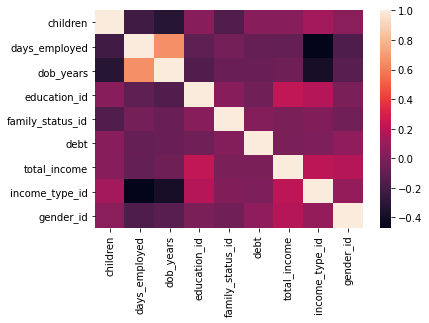

In [133]:
#create correlation chart
import seaborn as sns 
sns.heatmap(credit_nonna_corr);




<font color='purple'>
    
We see in the heatmap that the most impactful features on total income are education, income type and gender, with an absolute correlation of 0.23, 0.21 and 0.18, respectively.
Now, we'll assign each row a new ID built as the concatenation of the three aforementioned columns ids and re-assess the correlation rate
    
</font>

In [134]:
#creating a function to concatenate the three IDs:
def concatenate_ids(df):
    education_id= df['education_id']
    income_type_id= df['income_type_id']
    gender_id= df['gender_id']
    added_id = (education_id+income_type_id+gender_id)
    
    return added_id

In [135]:
credit_df_nona['mixed_id'] = credit_df_nona.apply(concatenate_ids, axis=1)

In [136]:
credit_df_nona

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_type_id,gender_id,mixed_id
0,1,8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,property acquisition,35-44,3,0,7
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,3,0,4
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property acquisition,25-34,3,1,5
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,25-34,3,1,5
4,0,6570.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,45-54,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19345,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,house renovation,35-44,5,0,6
19346,0,11680.000000,67,secondary education,1,married,0,F,retiree,0,24959.969,car purchase,65+,2,0,3
19347,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property acquisition,35-44,3,1,5
19348,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car purchase,35-44,3,1,5


In [137]:
#re-create correlation table with mixed id
credit_nonna_corr= round(credit_df_nona.corr(),2)

credit_nonna_corr

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,gender_id,mixed_id
children,1.00,-0.22,-0.32,0.03,-0.16,0.03,0.03,0.13,0.04,0.10
days_employed,-0.22,1.00,0.66,-0.11,-0.03,-0.08,-0.09,-0.47,-0.17,-0.38
dob_years,-0.32,0.66,1.00,-0.16,-0.07,-0.07,-0.06,-0.38,-0.13,-0.35
education_id,0.03,-0.11,-0.16,1.00,0.03,-0.05,0.23,0.19,-0.01,0.79
family_status_id,-0.16,-0.03,-0.07,0.03,1.00,0.02,-0.01,0.01,-0.04,0.02
debt,0.03,-0.08,-0.07,-0.05,0.02,1.00,-0.01,0.00,0.06,-0.02
total_income,0.03,-0.09,-0.06,0.23,-0.01,-0.01,1.00,0.21,0.18,0.32
income_type_id,0.13,-0.47,-0.38,0.19,0.01,0.00,0.21,1.00,0.08,0.70
gender_id,0.04,-0.17,-0.13,-0.01,-0.04,0.06,0.18,0.08,1.00,0.28
mixed_id,0.10,-0.38,-0.35,0.79,0.02,-0.02,0.32,0.70,0.28,1.00


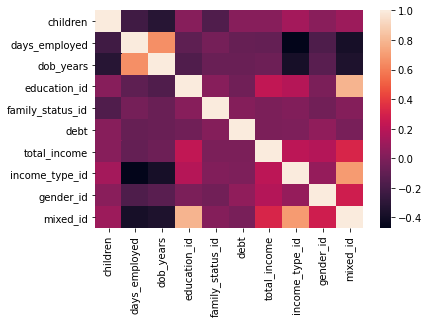

In [138]:
sns.heatmap(credit_nonna_corr);



<font color='purple'>
    
Adding up these three features we got a correlation of 0.32
    

    
</font>

In [139]:
# Look at the mean values for income based on your identified factors

credit_df_nonna_grouped_a= credit_df_nona.groupby('mixed_id').agg({'total_income':['mean','median','std']})

credit_df_nonna_grouped_a

total_income                          
                  mean      median           std
mixed_id                                        
2         17306.756149  16188.8905   8900.151895
3         20745.255633  18101.9800  11588.583852
4         22410.174085  19891.5280  12392.902387
5         26678.535956  24233.6100  13570.775433
6         26280.640110  23283.5160  13676.465256
7         30516.240572  26434.4830  17521.188224
8         32384.547114  28531.4480  18537.098858
9         35385.843664  30876.6670  20710.472493
10        45881.259104  37290.3815  34159.995376

In [140]:
# Look at the median values for income based on your identified factors




<font color='purple'>
    
Based on the three aspects that were most correlated to total_income, I created a column that creates a new ID adding them up. 

First, I tried concatenating the three of them (education_id & income_type_id & gender_id), and saw the rate raise to 0.27.
Then, I multiplied each id x its correlation factor:
(education_id x 0.23 + income_type_id x 0.21 + gender_id x 0.18) / (0.23 + 0.21 + 0.18) 
what caused a hike of 0.04 (i.e. 0.31)

Finally, by simply adding them up I got to a 0.32 correlation, which is what I'll finally use to replace total_income missing values.
    
</font>



<font color='purple'>
    
After grouping by the new ID created and calculating the mean, median, and standard deviation, I decided to use the median due to the considerable dispersion found in data.
    
</font>



In [141]:
#  Write a function that we will use for filling in missing values
def fill_total_income (df):
    mixed_id = df['mixed_id']
    income_to_fill = round(credit_df_nonna_grouped_a['total_income']['median'][mixed_id],0)
    return income_to_fill
        

In [142]:
#Adding mixed id to the full dataset
credit_df['mixed_id'] = credit_df.apply(concatenate_ids, axis=1)
credit_df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_type_id,gender_id,mixed_id
0,1,8437.673028,42,bachelor's degree,4,married,0,F,employee,0,40620.102,property acquisition,35-44,3,0,7
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35-44,3,0,4
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,property acquisition,25-34,3,1,5
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,25-34,3,1,5
4,0,6570.000000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,45-54,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,house renovation,35-44,5,0,6
21449,0,11680.000000,67,secondary education,1,married,0,F,retiree,0,24959.969,car purchase,65+,2,0,3
21450,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property acquisition,35-44,3,1,5
21451,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car purchase,35-44,3,1,5


In [143]:
# Check if it works
fill_total_income (credit_df.iloc[0])


26434.0

In [144]:
# Apply it to every row


In [145]:
#Store indexes where income is missing to check they were filled correctly
indexes_missing_income= list(credit_df.loc[credit_df['total_income'].isna()].index)


In [146]:
#applying function to fill missing values
credit_df.loc[credit_df['total_income'].isna(),'total_income'] = credit_df.loc[credit_df['total_income'].isna()].apply(fill_total_income, axis=1)

In [147]:
# Check if we got any errors
for i in indexes_missing_income:
    print(credit_df.iloc[i]['mixed_id'], credit_df.iloc[i]['total_income'])

4 19892.0
6 23284.0
3 18102.0
5 24234.0
3 18102.0
7 26434.0
6 23284.0
9 30877.0
7 26434.0
5 24234.0
7 26434.0
9 30877.0
4 19892.0
7 26434.0
4 19892.0
9 30877.0
7 26434.0
5 24234.0
4 19892.0
9 30877.0
6 23284.0
4 19892.0
7 26434.0
8 28531.0
5 24234.0
5 24234.0
6 23284.0
7 26434.0
4 19892.0
4 19892.0
4 19892.0
3 18102.0
5 24234.0
8 28531.0
4 19892.0
10 37290.0
3 18102.0
4 19892.0
7 26434.0
3 18102.0
6 23284.0
7 26434.0
9 30877.0
6 23284.0
6 23284.0
3 18102.0
4 19892.0
4 19892.0
6 23284.0
3 18102.0
6 23284.0
8 28531.0
8 28531.0
6 23284.0
10 37290.0
4 19892.0
4 19892.0
5 24234.0
5 24234.0
6 23284.0
8 28531.0
4 19892.0
4 19892.0
6 23284.0
6 23284.0
4 19892.0
8 28531.0
8 28531.0
8 28531.0
5 24234.0
3 18102.0
9 30877.0
8 28531.0
4 19892.0
10 37290.0
6 23284.0
5 24234.0
5 24234.0
7 26434.0
9 30877.0
6 23284.0
10 37290.0
4 19892.0
9 30877.0
4 19892.0
10 37290.0
5 24234.0
4 19892.0
3 18102.0
7 26434.0
7 26434.0
7 26434.0
5 24234.0
3 18102.0
8 28531.0
5 24234.0
4 19892.0
5 24234.0
4 19892.0
7 264



<font color='purple'>
    
No errors were found
    
</font>

Check that the total number of values in this column matches the number of values in other ones

In [149]:
# Checking the number of entries in the columns

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19736 non-null  float64
 2   dob_years         21453 non-null  int32  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
 13  income_type_id    21453 non-null  int64  
 14  gender_id         21453 non-null  int64  
 15  mixed_id          21453 non-null  int64  
dtypes: float64(2), int32(1), int64(7), objec

###  Restoring values in `days_employed`

Now we'll think about the parameters that may help restore the missing values in this column.

In [150]:
#Recall from the correlation table we created
credit_nonna_corr

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,gender_id,mixed_id
children,1.00,-0.22,-0.32,0.03,-0.16,0.03,0.03,0.13,0.04,0.10
days_employed,-0.22,1.00,0.66,-0.11,-0.03,-0.08,-0.09,-0.47,-0.17,-0.38
dob_years,-0.32,0.66,1.00,-0.16,-0.07,-0.07,-0.06,-0.38,-0.13,-0.35
education_id,0.03,-0.11,-0.16,1.00,0.03,-0.05,0.23,0.19,-0.01,0.79
family_status_id,-0.16,-0.03,-0.07,0.03,1.00,0.02,-0.01,0.01,-0.04,0.02
debt,0.03,-0.08,-0.07,-0.05,0.02,1.00,-0.01,0.00,0.06,-0.02
total_income,0.03,-0.09,-0.06,0.23,-0.01,-0.01,1.00,0.21,0.18,0.32
income_type_id,0.13,-0.47,-0.38,0.19,0.01,0.00,0.21,1.00,0.08,0.70
gender_id,0.04,-0.17,-0.13,-0.01,-0.04,0.06,0.18,0.08,1.00,0.28
mixed_id,0.10,-0.38,-0.35,0.79,0.02,-0.02,0.32,0.70,0.28,1.00


In [151]:
# Distribution of `days_employed` medians based on your identified parameters

#income_type_id is the most impactful factor
credit_df_nonna_grouped_b= credit_df_nona.groupby(['income_type_id','income_type']).agg({'days_employed':['mean','median','std']})
credit_df_nonna_grouped_b


days_employed                          
                                      mean       median          std
income_type_id income_type                                          
0              student          578.751554   578.751554          NaN
1              unemployed         0.000000     0.000000     0.000000
2              retiree         8955.380482  9125.000000  2176.174858
3              employee        2326.596097  1574.429209  2307.829257
4              civil servant   3399.896902  2689.368353  2788.371363
5              business        2111.122879  1545.284206  2048.580259

In [152]:
# Distribution of `days_employed` means based on your identified parameters
#covered above



<font color='purple'>
 As well as with total_income, I decided to use the median due to the standard deviation being relatively high.
    
</font>



In [153]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter

def fill_days_employed (df):
    income_type_id = df['income_type_id']
    days_to_fill = round(credit_df_nonna_grouped_b['days_employed']['median'][income_type_id][0],0)
    return days_to_fill


In [154]:
# Check that the function works

print(credit_df_nona.iloc[0]['income_type_id'], fill_days_employed (credit_df_nona.iloc[0]))

3 1574.0


In [155]:
# Apply function to the income_type



In [156]:
#get indexes for rows missing days employed (in these case, they'll match the ones with missing total_income)
indexes_missing_daysemployed= list(credit_df.loc[credit_df['days_employed'].isna()].index)
len(indexes_missing_daysemployed)

1717

In [157]:
#applying function to fill missing values
credit_df.loc[credit_df['days_employed'].isna(),'days_employed'] = credit_df.loc[credit_df['days_employed'].isna()].apply(fill_days_employed, axis=1)

In [158]:
# Check if we got any errors
for i in indexes_missing_daysemployed:
    print(credit_df.iloc[i]['income_type_id'], credit_df.iloc[i]['days_employed'])

4 2689.0
4 2689.0
5 1545.0
4 2689.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
4 2689.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
5 1545.0
4 2689.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
4 2689.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
4 2689.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
5 1545.0
5 1545.0
5 1545.0
5 1545.0
3 1574.0
5 1545.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
4 2689.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
4 2689.0
3 1574.0
5 1545.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
4 2689.0
3 1574.0
3 1574.0
3 1574.0
3 1574.0
5 1545.0
3 1574.0
3 1574.0
3 1574.0
5

In [159]:
# Check if function worked

credit_df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
income_type_id      0
gender_id           0
mixed_id            0
dtype: int64

In [160]:
# Replacing missing values





<font color='purple'>
    
No errors were found, there are no more missing values in the dataset
    
</font>

In [161]:
#rechecking reasonableness of days employed in relation to age
credit_df['work_experience_status']=credit_df[credit_df['days_employed'].isna()==False].apply(checking_work_experience, axis=1)


In [162]:
help(checking_work_experience)

Help on function checking_work_experience in module __main__:

checking_work_experience(df)
    Returns 'Days_employed_ok' if age is greater than days employed
    or
    'Incorrect_days_employed' otherwise



In [163]:
len(credit_df[credit_df['work_experience_status']=='Incorrect_days_employed'])

0

In [164]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                21453 non-null  int64  
 1   days_employed           21453 non-null  float64
 2   dob_years               21453 non-null  int32  
 3   education               21453 non-null  object 
 4   education_id            21453 non-null  int64  
 5   family_status           21453 non-null  object 
 6   family_status_id        21453 non-null  int64  
 7   gender                  21453 non-null  object 
 8   income_type             21453 non-null  object 
 9   debt                    21453 non-null  int64  
 10  total_income            21453 non-null  float64
 11  purpose                 21453 non-null  object 
 12  age_group               21453 non-null  object 
 13  income_type_id          21453 non-null  int64  
 14  gender_id               21453 non-null

In [165]:
#Drop column

credit_df = credit_df.drop(columns='work_experience_status')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     21453 non-null  float64
 2   dob_years         21453 non-null  int32  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
 13  income_type_id    21453 non-null  int64  
 14  gender_id         21453 non-null  int64  
 15  mixed_id          21453 non-null  int64  
dtypes: float64(2), int32(1), int64(7), objec

In [166]:
#Convert days employed and total income to integers

credit_df['days_employed']=credit_df['days_employed'].astype('int')
credit_df['total_income']=credit_df['total_income'].astype('int')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  int32 
 2   dob_years         21453 non-null  int32 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  int32 
 11  purpose           21453 non-null  object
 12  age_group         21453 non-null  object
 13  income_type_id    21453 non-null  int64 
 14  gender_id         21453 non-null  int64 
 15  mixed_id          21453 non-null  int64 
dtypes: int32(3), int64(7), object(6)
memory usage: 2.4+ MB


Check that the total number of values in this column matches the number of values in other ones.

In [167]:
# Check the entries in all columns - make sure we fixed all missing values
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  int32 
 2   dob_years         21453 non-null  int32 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  int32 
 11  purpose           21453 non-null  object
 12  age_group         21453 non-null  object
 13  income_type_id    21453 non-null  int64 
 14  gender_id         21453 non-null  int64 
 15  mixed_id          21453 non-null  int64 
dtypes: int32(3), int64(7), object(6)
memory usage: 2.4+ MB


## Categorization of data

To answer the questions and test the hypotheses, we will work with categorized data. Below we will find a template through which we can work your way when categorizing data. The first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized.



In [169]:
# Print the values for your selected data for categorization
credit_df['children'].value_counts()

0    14213
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Identify main groups based on the unique values



In [170]:
# Let's write a function to categorize the data based on common topics
#Categorizing data: Has/does not have children (for question 1)
def has_children (children):
    '''
    Returns 1 if the person has children 
    and 0 otherwise
    
    '''
    
    
    has_children = int(children>0)
    
    return has_children


In [171]:
# Create a column with the categories and count the values for them
##Apply function and check result
credit_df['has_children'] = credit_df['children'].apply(has_children)
print(len(credit_df[credit_df['children']>0]), len(credit_df[(credit_df['children']>0) & (credit_df['has_children']==1)]))

7240 7240


In [172]:
#Counting how many people have/don't have children
credit_df['has_children'].value_counts()

0    14213
1     7240
Name: has_children, dtype: int64

Let's check unique values

In [173]:
#Categorizing data: has/does not have partner(for question 2)
def has_partner (family_status):
    '''
    Returns 1 if the individual is married 
    or in a civil partnership, 
    and 0 otherwise.
    '''
    
    
    
    has_partner = int(family_status<2)
    return has_partner

In [174]:
##Apply function
credit_df['has_partner'] = credit_df['family_status_id'].apply(has_partner)


In [175]:
#check result
print(len(credit_df[credit_df['family_status_id']<2]), len(credit_df[(credit_df['family_status_id']<2) & (credit_df['has_partner']==1)]))

16489 16489


In [176]:
# Check the unique values
#Counting how many people have/don't have partner
credit_df['has_partner'].value_counts()

1    16489
0     4964
Name: has_partner, dtype: int64

In [178]:
# Getting summary statistics for the column

credit_df['total_income'].describe()

count     21453.000000
mean      26475.536102
std       15737.503525
min        3306.000000
25%       17202.000000
50%       23284.000000
75%       31461.000000
max      362496.000000
Name: total_income, dtype: float64



<font color='purple'>
    
The ranges that will be used for grouping income levels will be:
    
    - Under 10,000    
    - 10,000 to 19,000    
    - 20,000 to 29,000    
    - 30,000 to 40,000    
    - Above 40,000
    
This decision is based on total_income percentiles distribution (up to the 75% of the people, received an income below the 40k threshold). 
    
</font>

In [179]:
# Creating function for categorizing into different numerical groups based on ranges

def income_level (total_income):
    '''
    Groups people by income level, spliting them into different ranges:

    - Under 10,000    
    - 10,000 to 19,000    
    - 20,000 to 29,000    
    - 30,000 to 40,000    
    - Above 40,000
    '''
    if total_income < 10000:
        return 'Under $10,000'
    elif total_income < 20000:
        return '$10,000 - $19,000'
    elif total_income < 30000:
        return '$20,000 - $29,000'
    elif total_income < 40000:
        return '$30,000 - $39,000' 
    else:
        return 'Above $40,000'



In [180]:
# Creating column with categories
credit_df['income_level'] = credit_df['total_income'].apply(income_level)

In [181]:
# Count each categories values to see the distribution
credit_df['income_level'].value_counts()

$10,000 - $19,000    7267
$20,000 - $29,000    7131
$30,000 - $39,000    3317
Above $40,000        2812
Under $10,000         926
Name: income_level, dtype: int64

In [182]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  int32 
 2   dob_years         21453 non-null  int32 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  int32 
 11  purpose           21453 non-null  object
 12  age_group         21453 non-null  object
 13  income_type_id    21453 non-null  int64 
 14  gender_id         21453 non-null  int64 
 15  mixed_id          21453 non-null  int64 
 16  has_children      21453 non-null  int64 
 17  has_partner 

## Checking the Hypotheses


In [183]:
credit_df_corr= round(credit_df.corr(),2)

credit_df_corr

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,income_type_id,gender_id,mixed_id,has_children,has_partner
children,1.00,-0.22,-0.32,0.03,-0.16,0.02,0.03,0.13,0.05,0.10,0.88,0.16
days_employed,-0.22,1.00,0.66,-0.11,-0.03,-0.07,-0.10,-0.48,-0.17,-0.38,-0.24,-0.03
dob_years,-0.32,0.66,1.00,-0.16,-0.07,-0.07,-0.06,-0.38,-0.14,-0.35,-0.34,-0.02
education_id,0.03,-0.11,-0.16,1.00,0.04,-0.06,0.23,0.19,-0.01,0.80,0.04,-0.02
family_status_id,-0.16,-0.03,-0.07,0.04,1.00,0.02,-0.01,0.01,-0.04,0.02,-0.14,-0.93
debt,0.02,-0.07,-0.07,-0.06,0.02,1.00,-0.01,-0.00,0.06,-0.03,0.03,-0.01
total_income,0.03,-0.10,-0.06,0.23,-0.01,-0.01,1.00,0.22,0.18,0.32,0.03,0.02
income_type_id,0.13,-0.48,-0.38,0.19,0.01,-0.00,0.22,1.00,0.08,0.70,0.14,0.03
gender_id,0.05,-0.17,-0.14,-0.01,-0.04,0.06,0.18,0.08,1.00,0.28,0.04,0.07
mixed_id,0.10,-0.38,-0.35,0.80,0.02,-0.03,0.32,0.70,0.28,1.00,0.12,0.02


**Is there a correlation between having children and paying back on time?**

In [184]:
# Check the children data and paying back on time
default_rate_has_children = pd.DataFrame({'defaulted': credit_df.groupby('has_children')['debt'].sum(),
                                         'total': credit_df.groupby('has_children')['debt'].count(),
                                         '%':round(credit_df.groupby('has_children')['debt'].sum()/ credit_df.groupby('has_children')['debt'].count()*100,2)})
default_rate_has_children.sort_values('%')

,defaulted,total,%
has_children,,,
0,1072,14213,7.54
1,669,7240,9.24


In [185]:

# Calculating default-rate based on the number of children

default_rate_by_children = pd.DataFrame({'defaulted': credit_df.groupby('children')['debt'].sum(),
                                         'total': credit_df.groupby('children')['debt'].count(),
                                         '%':round(credit_df.groupby('children')['debt'].sum()/ credit_df.groupby('children')['debt'].count()*100,2)})
default_rate_by_children.sort_values('%') 

,defaulted,total,%
children,,,
5,0,9,0.00
0,1072,14213,7.54
3,27,330,8.18
1,444,4808,9.23
2,194,2052,9.45
4,4,41,9.76


**Conclusion**






<font color='purple'>
Individuals with 5 children have a 0% default rate, which is most likely due to the lack of representativeness of this category. Excluding those 9 clients, the conclusion is that people with no children have a lower default rate. Also, the rate increases as the number of children does.
    
</font>

**Is there a correlation between family status and paying back on time?**

In [186]:
# Check the family status data and paying back on time


default_rate_has_partner = pd.DataFrame({'defaulted': credit_df.groupby('has_partner')['debt'].sum(),
                                         'total': credit_df.groupby('has_partner')['debt'].count(),
                                         '%':round(credit_df.groupby('has_partner')['debt'].sum()/ credit_df.groupby('has_partner')['debt'].count()*100,2)})
default_rate_has_partner.sort_values('%')


,defaulted,total,%
has_partner,,,
1,1319,16489,8.0
0,422,4964,8.5


In [187]:


default_rate_has_partner = pd.DataFrame({'defaulted': credit_df.groupby(['gender','has_partner'])['debt'].sum(),
                                         'total': credit_df.groupby(['gender','has_partner'])['debt'].count(),
                                         '%':round(credit_df.groupby(['gender','has_partner'])['debt'].sum()/ credit_df.groupby(['gender','has_partner'])['debt'].count()*100,2)})
default_rate_has_partner.sort_values('%')


defaulted  total      %
gender has_partner                         
F      0                  231   3569   6.47
       1                  763  10605   7.19
M      1                  556   5884   9.45
       0                  191   1395  13.69

In [188]:
# Calculating default-rate based on family status
default_rate_by_family = pd.DataFrame({'defaulted': credit_df.groupby(['family_status_id','family_status'])['debt'].sum(),
                                         'total': credit_df.groupby(['family_status_id','family_status'])['debt'].count(),
                                         '%':round(credit_df.groupby(['family_status_id','family_status'])['debt'].sum()/ credit_df.groupby(['family_status_id','family_status'])['debt'].count()*100,2)})
default_rate_by_family.sort_values('%') 

,,defaulted,total,%
family_status_id,family_status,,,
2,widow / widower,63,959,6.57
3,divorced,85,1195,7.11
0,married,931,12339,7.55
1,civil partnership,388,4150,9.35
4,unmarried,274,2810,9.75


In [189]:

# Calculating default-rate based on family status & gender
default_rate_by_family = pd.DataFrame({'defaulted': credit_df.groupby(['gender','family_status_id','family_status'])['debt'].sum(),
                                         'total': credit_df.groupby(['gender','family_status_id','family_status'])['debt'].count(),
                                         '%':round(credit_df.groupby(['gender','family_status_id','family_status'])['debt'].sum()/ credit_df.groupby(['gender','family_status_id','family_status'])['debt'].count()*100,2)})
default_rate_by_family.sort_values('%') 

defaulted  total      %
gender family_status_id family_status                             
F      2                widow / widower           52    904   5.75
       3                divorced                  61    936   6.52
       4                unmarried                118   1729   6.82
       0                married                  530   7760   6.83
       1                civil partnership        233   2845   8.19
M      0                married                  401   4579   8.76
       3                divorced                  24    259   9.27
       1                civil partnership        155   1305  11.88
       4                unmarried                156   1081  14.43
       2                widow / widower           11     55  20.00

**Conclusion**




<font color='purple'>
    
When analyzing both genders as a whole, the general conclusion is that people who are married or in a civil partnership have a 0.5% lower default rate than those who are single. But after breaking down the evaluation by gender, an opposite behaviour is detected: single men are more likely to fail a repayment than those who have a partner, and women are the other way round.
    
This is extremely evident for one of the categories: Widows have the lowest defaults rate and widowers, the highest of all. 
    
</font>

**Is there a correlation between income level and paying back on time?**

In [190]:
# Check the income level data and paying back on time
# Calculating default-rate based on income level

default_rate_by_income = pd.DataFrame({'defaulted': credit_df.groupby('income_level')['debt'].sum(),
                                         'total': credit_df.groupby('income_level')['debt'].count(),
                                         '%':round(credit_df.groupby('income_level')['debt'].sum()/ credit_df.groupby('income_level')['debt'].count()*100,2)})
default_rate_by_income.sort_values('%') 



,defaulted,total,%
income_level,,,
"Under $10,000",58,926,6.26
"Above $40,000",194,2812,6.90
"$30,000 - $39,000",250,3317,7.54
"$10,000 - $19,000",622,7267,8.56
"$20,000 - $29,000",617,7131,8.65


**Conclusion**




<font color='purple'>
    
Against all odds, the correlation between total_income and debt is of only -0.01. This is in line with the table above: the default rate does not increase proportionally to the income range.
    
</font>

**How does credit purpose affect the default rate?**

In [191]:
# Check the percentages for default rate for each credit purpose and analyze them


default_rate_by_purpose = pd.DataFrame({'defaulted': credit_df.groupby('purpose')['debt'].sum(),
                                         'total': credit_df.groupby('purpose')['debt'].count(),
                                         '%':round(credit_df.groupby('purpose')['debt'].sum()/ credit_df.groupby('purpose')['debt'].count()*100,2)})
default_rate_by_purpose.sort_values('%') 

,defaulted,total,%
purpose,,,
house renovation,129,1905,6.77
property acquisition,653,8905,7.33
wedding,186,2324,8.00
education,370,4013,9.22
car purchase,403,4306,9.36




<font color='purple'>
    
Even though the % of defaults varies accross the different purposes, there's not a remarkable spread among them, and there's no linear relationship between the expected principal amount and the default rate. For example, the highest rate is for car purchase, which is supposed to involve the smallest amount. Education and wedding follow, which are also smaller loans than what a property acquisition demands. The conclusion is probably that the more ephemeral the purpose , the highest the probability of getting delayed on repayments.
    
</font>

**Conclusion**


# General Conclusion 




**<span style="color:purple">SUMMARY:</span>**

<font color='purple'>

The dataset contains 12 columns with information about clients of a financing entity:

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

All the columns are adequately named.
    
There are 21525 rows in total, but ``days_employed`` and `total_income` store a total of 19351 non-null values each, as they have 2174 (10%) values considered as missing not at random in the exact same rows.
   
    
Since the empty observations are simetrically spread accross business owners, employees, civil servants and retirees (roughly a 10% of each category is missing), we know that the reason is not that those people are not receiving any proceedings due to not being employed. The mean and median age (which are very close to each other, meaning that there are no significant outliers) of individuals whose employment information is missing also match the ones calculated for the full dataset (hence, we conclude that the reason they're blank is not related to people's age -older people could, for example, be more conservative about sharing private information-).
    
    
Most of the individuals for whom ``income`` and ``days_employed`` is unavailable have a low education level (1- Secondary education) and are married or in a civil partnership (probably economicallty dependant on their partners). Also, the 75% of them have 1 children or less, whereas the 50% don't have any children at all.
    
There is a predominance of females, and the fact that they haven't had any previous defaults is most likely due to not having accessed to any borrowings in the first place.
    

As a general conclusion, judging from the marital status, education level and children in charge, we may say that this people propbably didn't provide any data on their employment situation because of receiving too low an income .    
    

**<span style="color:purple">Data transformation:</span>**
    
Before addressing missing values, the following steps were followed in order to clean the dataset first:
    
- ``education``: there are 5 education_ids and levels, but education categories' description had to be homogenized by switching all the strings to lower case.

-  ``children``: there were rows with 20 and -1 children assigned (only representing the 0.57% of the dataset). Both were replaced by 0, which is both the median and the mode (65% of the individuals don't have children).
    
- ``days_employed``: even before tackling the problem of empty values, we detected two issues with existing ones:
    - a) 73% of the values were negative: they were replaced by their absolute value on the assumption that the dates had been subtracted in the wrong order.
    - b) Every retiree (3443 in total) and unemployed people (2 in total) had days_employed exceeding the 300k threshold, what would mean they were employed for more than 1000 years. As there is no information on what the former did for a living, and the mean & median age of this category is higher than the rest, instead of using a metric pulled from the other income_types, the values were filled based on their age. For the 2 unemployed, the value was set at 0 because of having no evidence of them being ever employed.

    Before correcting retires' work experience, we checked whether ``dob_years`` values had any issues, and came accross 101 individuals (from differente categories) who were 0 years old. These were changed by the median of the same income_type bucket (which is almost the same as the median in every case). After that fix, everyone in the dataset is over 18 and under 75 years old. 
    As for retirees, there are still people between 22 and 45, which are rather small for a retiree, but still we'll assume they are edge cases and leave them as are, mainly due to lacking further information.
    
     The logic used for calculating retirees' days_employed was set as follows:
     
    If the person is under 30, we assumed they started working at 18, so we subtracted that amount to their age.
    
    If between 30 and 39, we calculated it as age less 27 years.
    For everyone aged 40 or older, we rested 35 years.
    
    Taking 'employees' as a benchmark, we concluded it worked fine, since retirees' median and mean age is 20 years above the formers', and they resulted to be employed for an average of 18 years more.
    
    The aforementioned corrections involved filling in 413 out of the 2174 missing values in days_employed, since we applied the same formula to all the retirees, regardless of them having too high a figure or no data at all.
    
    - c) A function was applied to be sure that days employed was not greater than the client's age in any row, what turned out to be correct and needed no fix.
    
    
    
- ``dob_years``: apart from switching 0 values by the median of each income_type category, the data type was changed from float to integer, as there's no point in showing decimal points here.
    

  
- ``family_status``: no problem was found here, as there were 5 well differenciated categories, each with a unique id assigned. 
    
- ``gender``: everyone was either male or female, except for one row where the value was 'XNA'. This one was dropped from the dataset.
    
- ``income_type``: initially, there were 8 different groups, but the two individuals classified as 'entrepreneurs' were merged to the 'business' category, and the only one with 'paternity/maternity leave' proceedings was changed to 'employee' (as the paid leave is nothing but a temporary situation).
    
    Up to the 75% of the people have monthly incomes above 3k and below 32k. The one with the maximum income earns $362 k monthly, which is rather high, but as the income_type is 'business', it was decided to take it as valid.
    
    
 - DUPLICATES: 71 Duplicates were found and removed from the dataset. 
 
The length after that dropping duplicates + the row where gender was 'XNA' stayed at 21453 rows, with 19350 non-null values in total_income (1 Nan dropped), and 19736 non-null values in days_employed (27 Nan dropped). Recall from the fix in retirees' days_employed that Null values had been already filled for this category.


 -``purpose``: there were many different expressions for referring to the same purpose. Hence, they were re-groupped into 5 unique categories: new property (buying or building), house renovation, car purchase (new or second-hand), education and wedding.
 
 
 
    
- MISSING VALUES: for the sake of accuracy, instead of filling the values using the mean or median of what are intuitively thought to be the most influencing factors in ``days_employed`` and ```total_income``, the correlation between columns was assessed as a first step.

 - ``total_income``:

 - 1) All the unique values in categorical columns (except for purpose, which is not associated neither with the amount of time people was employed nor with their earnings), were assigned a numerical correlative ID respecting the order in which they were sorted after grouping by that column and calculating the mean total_income for each unique category within (the higher the mean income, the higher the ID).
 
 - 2) A new table was created, excluding the missing values. Based on this data, the correlation between columns was assessed, resulting on ``education``, ``income_type`` and ``gender`` being the factors more closely related to monthly income. The three of them were combined creating a ``mixed_id``, calculated as their sum. Upon recalculating correlation, a substantial improvement was detected, as the dependency rate increased from a maximum of 0.23 to 0.32. 
 
 - 3) All the missing values in ``total_income`` were filled using the median of the corresponding mixed_id (the mean was not preferred because of the standard deviation being to high).
 
 
 - ``days_employed``:
 
  - 1) ``income_type`` was the most highly correlated factor, with an index of 0.47.
  - 2) Empty values were replaced by the median for each income type.
  - 3) The full dataset was tested again to ensure there are no rows which days_employed value overcomes dob_years(age).
  
  
 - Finally, both days_employed and total_income were changed to integer type.
 
 
    
- CATEGORIZATION OF DATA.

To be able to test our hypotheses, data was categorized adding a new subset of columns:
 - ``has_children``: 1 if the person has 1 children or more, and 0 otherwise.
 - ``has_partner``: 1 if the person is either married or in a civil partnership, and 0 otherwise.
 - ``income_level``: the population was split into ranges of 10 k each up to 40,000 USD. Everyone above that figure was be groupped together.
 
    
-**HYPOTHESES TESTING.**

- **Correlation between having children and paying back on time**:
    - Individuals with no children had a 7.5 default rate, vs. a 9.2% default rate for those with 1+ children in charge. The difference is probably related to the latter having higher monthly expenses as well as prioritizing expenditures related to their children needs to repaying their debt. Howwever, the correlation is not too high, as we only see the defaults percentage raise slightly as the number of children increases.
    
- **Correlation between family status and paying back on time**:    
    - When analyzing both genders together, the general conclusion is that people who are married or in a civil partnership have a 0.5% lower default rate than those who are single. But after breaking down the evaluation by gender, an opposite behaviour is detected: single men are more likely to fail a repayment than those who have a partner, and women act the other way round.
    
This is extremely evident for one of the categories: Widows have the lowest defaults rate and widowers, the highest of all.

- **Correlation between income level and paying back on time**

    - Against all odds, the correlation between total_income and debt is of only -0.01. This is in line with the evolution of the default rate as we move through the ascending income ranges: it does not increase proportionally to the income range.

- **Correlation between purpose and paying back on time**

    - Even though the % of defaults varies accross the different purposes, there's not a remarkable spread among them, and there's no linear relationship between the expected principal amount and the default rate. For example, the highest rate is for car purchase, which is supposed to involve the smallest amount. Education and wedding follow, which are also smaller loans than what a property acquisition demands. The conclusion is probably that the more ephemeral the purpose , the highest the probability of getting delayed on repayments.
    
- **CONCLUSION**

- Based on the correlation table built up on the dataset, the three most impactful factors on debt are: days employed(-0.07), age (-0.07) and education (-0.06). However, the absolute correlation factors are rather low, meaning that the predictions we can pull from this analysis won't neccesarily be accurate enough.

</font>